# Coin Detection
**Name:** **HARI PRIYA M**    
**Reg. No:** **212224240047** 
**Slot:** **4E6-2**


# **Coin Detection using Morphological Operations and Thresholding**

## **Aim**
In this project, you will work with an image and apply morphological operations and thresholding techniques to detect and count the total number of coins present in the image.

---
**Note:**
   - **Do not remove intermediate images.**
   - Display all key intermediate images (grayscale, thresholded, binary, morphological result, final detections).
   - Document your findings and observations for each step.
   - Print the total number of coins detected using both **blob detection** and **contour detection** methods.

---

## **Expected Output**
All expected output images and results are already displayed.  
Enter your code only inside the blocks marked as:

```python
### Your Code Here ###


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [2]:
# Read image
image = cv2.imread("CoinsA.png") 

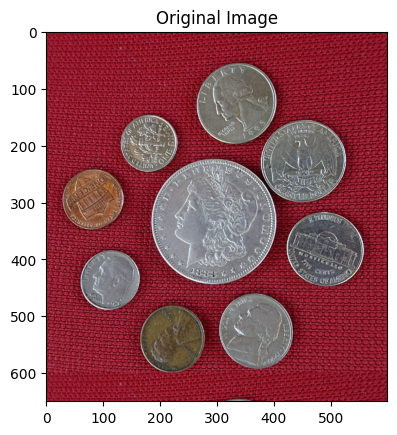

In [3]:
# Dont Change the Code 
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 2: Convert Image to Grayscale</font>

In [4]:
# Convert image to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

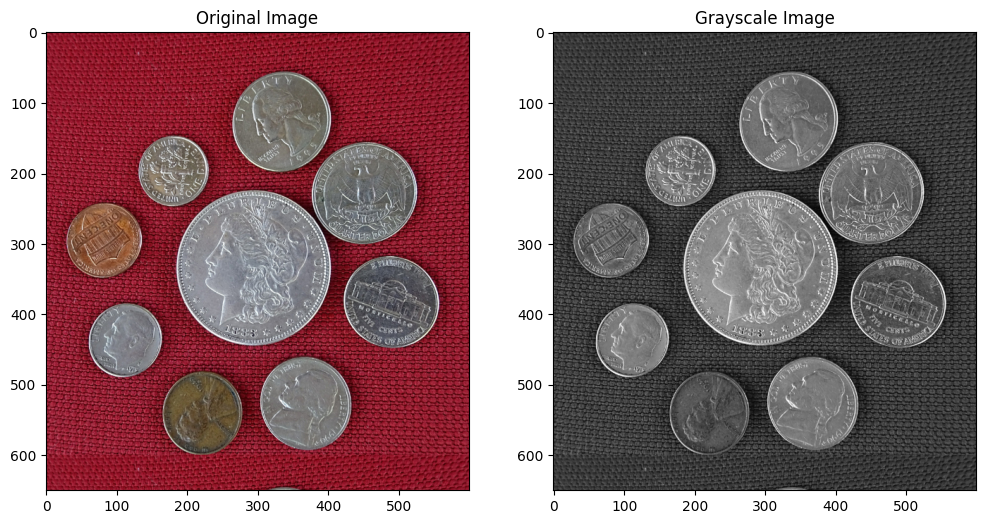

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 3: Split Image into R,G,B Channels</font>

In [6]:
# Split cell into channels
imageB, imageG, imageR = cv2.split(image)

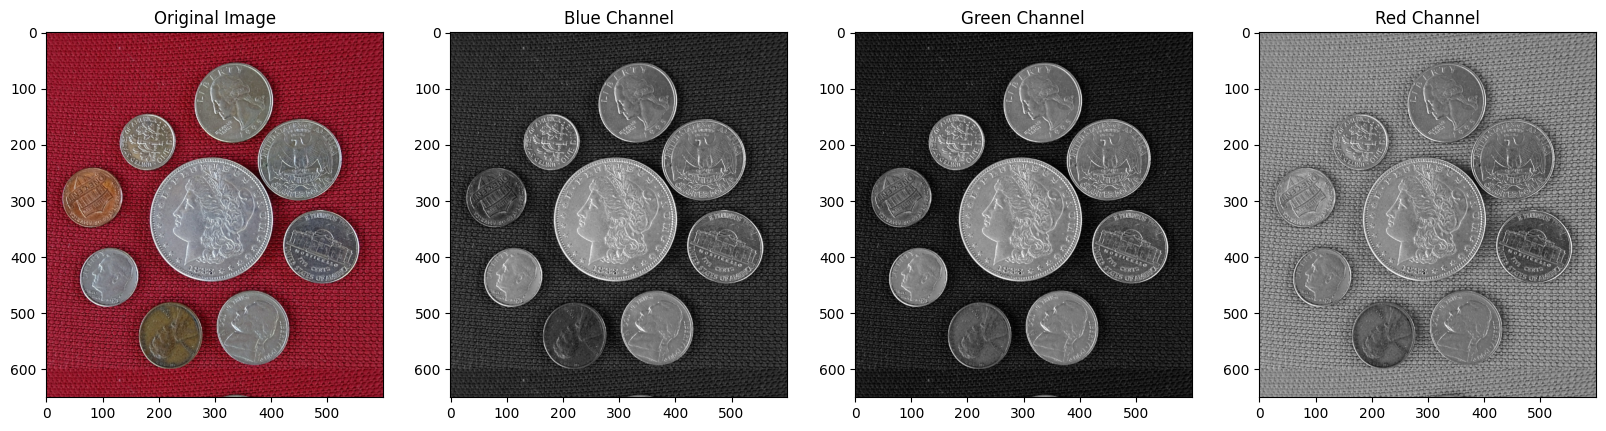

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 4: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [25]:
ret, imageThresh = cv2.threshold(imageGray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

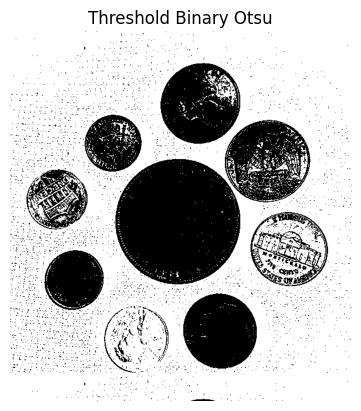

In [26]:
plt.imshow(imageThresh, cmap='gray')
plt.title("Threshold Binary Otsu")
plt.axis('off')
plt.show()

In [10]:
imageThresh = imageThresh2

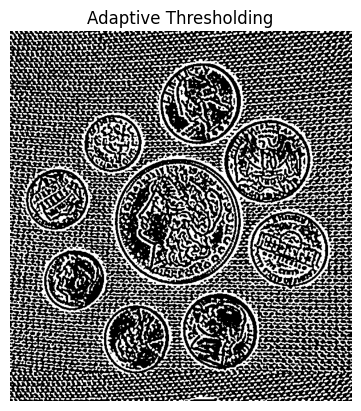

In [52]:
blur = cv2.GaussianBlur(imageGray, (7,7), 0)
imageThresh = cv2.adaptiveThreshold(blur, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(imageThresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()


## <font style = "color:rgb(50,120,229)">Step 5: Hough Circle Transform</font>

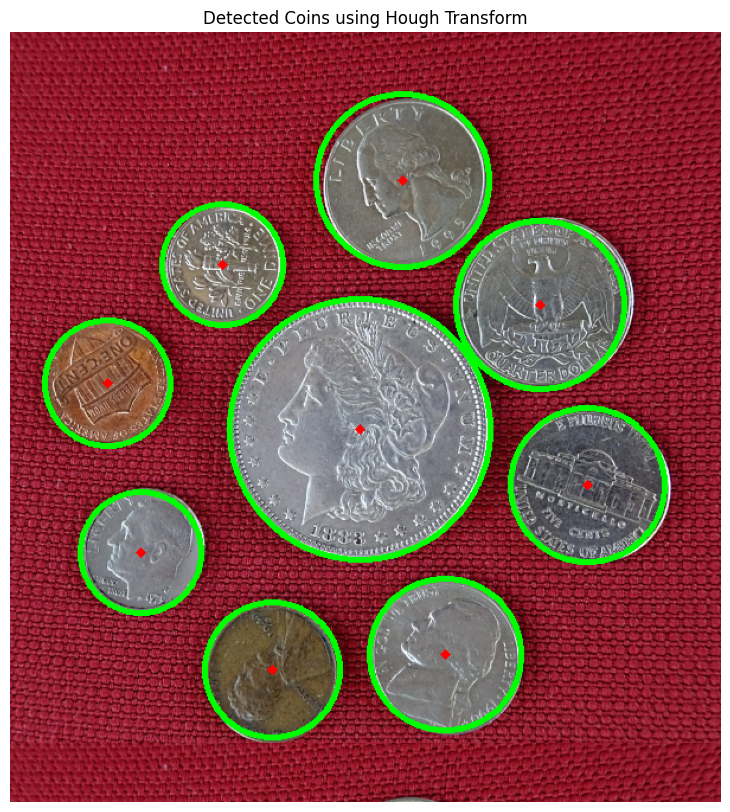

In [63]:
# Apply Gaussian Blur
img_blur = cv2.GaussianBlur(imageGray, (9,9), 2)

# Hough Circle Transform
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=120,
                           param1=100, param2=30,
                           minRadius=50, maxRadius=150)

output = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

plt.figure(figsize=(10,10))
plt.imshow(output[:,:,::-1])
plt.title("Detected Coins using Hough Transform")
plt.axis("off")
plt.show()

## <font style = "color:rgb(50,120,229)">Step 6: Detect Coins</font>

In [62]:
print("Number of coins detected:", len(circles[0]) if circles is not None else 0)

Number of coins detected: 9
